# Read MH02 

In [1]:
#add the dev version of aare
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')
import aare
from aare import CtbRawFile, RawMasterFile, File, RawFile, RawSubFile, DetectorType
from aare.transform import matterhorn02

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

#Rendering version
from IPython.display import Markdown, display
try:
    from importlib import metadata
    v = metadata.version('aare')
except:
    v = 'dev'
    
s = f'Example run on: **{dt.now():%Y-%m-%d %H:%M}** with aare: **{v}**'
display(Markdown(s))

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')

Example run on: **2024-11-27 15:59** with aare: **dev**

## Load a scan done with the scan function

- The master file has information about which threshold was scanned and the range

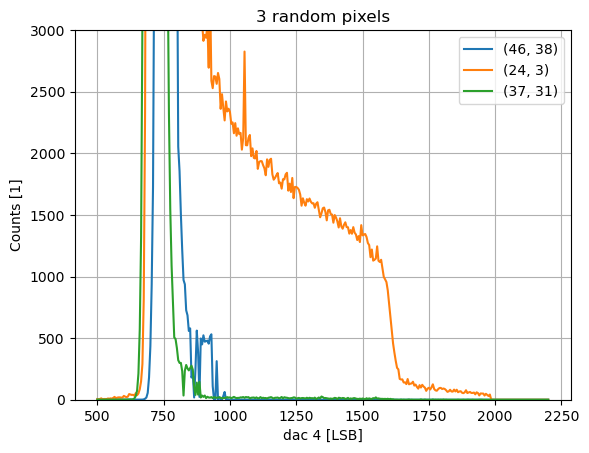

In [2]:
#single counter, scan enabled
fname = base / 'MH02/scan_12keV_vrf700_vrsh700_th0_master_0.json'

with CtbRawFile(fname, transform = matterhorn02) as f:
    header, data = f.read() #Read all frames from the file.
    par = f.scan_parameters
    th = np.arange(*par) #Generate threshold array from scan parameters. 

#plot a few pixels
n_pixels = 3
pixels = aare.random_pixels(n_pixels, xmax = data.shape[2], ymax = data.shape[1])

fig, ax = plt.subplots()
for pixel in pixels:
    ax.plot(th, data[:,*pixel], label = f'{pixel}')

ax.set_ylim(0,3e3)
ax.grid()
ax.set_xlabel(f'{par.dac} [LSB]')
ax.set_ylabel('Counts [1]')
ax.legend()
ax.set_title(f'{n_pixels} random pixels');

## Load a "manual" scan

- No information about the scan range in the file

[frame, counter, row, col]
data.shape=(340, 4, 48, 48)


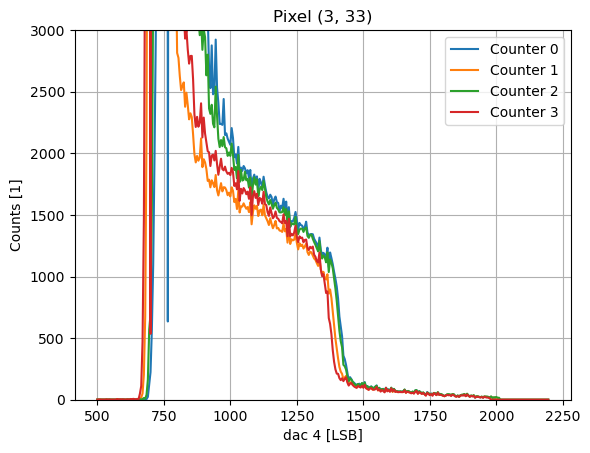

In [3]:
# four counters, "manual" scan. No info in raw file
fname = base / 'MH02/scan_all9keV_vrf700_vrsh700_th0_master_0.json'
with CtbRawFile(fname, transform=matterhorn02) as f:
    header, data = f.read()
    
#Since there is no information in the raw file we have to know this from
#our beamtime logbook. Or write metadata somewhere else
th = np.arange(500, 2200, 5)

#frame, counter, row, col
print('[frame, counter, row, col]')
print(f'{data.shape=}')

#plot the same pixel all counters
pixel = aare.random_pixel(xmax = data.shape[2], ymax = data.shape[1])
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(th, data[:,i,*pixel], label = f'Counter {i}')

ax.set_ylim(0,3e3)
ax.grid()
ax.set_xlabel(f'{par.dac} [LSB]')
ax.set_ylabel('Counts [1]')
ax.legend()
ax.set_title(f'Pixel {pixel}');